In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
path='C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\test data\\wang_count_table.txt'
df=pd.read_table(path,index_col=0)
df #行が遺伝子、列が細胞

,SRX003935,SRX003921,SRX003924,SRX003923,SRX003925,SRX003932,SRX003920,SRX003922,SRX001291,SRX001364,...,SRX001367,SRX001368,SRX003931,SRX003929,SRX003928,SRX003934,SRX003926,SRX003927,SRX003930,SRX003933
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,1,12,22,16,6,18,6,13,1,0,...,2,0,9,5,55,4,1,15,4,38
ENSG00000000005,0,0,0,0,0,42,0,51,0,0,...,0,0,3,1,0,1,1,3,0,0
ENSG00000000419,25,13,74,26,20,6,6,1,6,2,...,11,12,8,7,10,17,8,19,10,30
ENSG00000000457,65,19,22,26,30,9,14,14,12,7,...,26,29,12,8,13,25,8,11,24,38
ENSG00000000460,12,0,5,8,5,0,1,0,0,0,...,5,1,0,1,1,3,2,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRG_94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LRG_96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LRG_97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#各遺伝子の平均発現量を正規化
mean_expressons=np.mean(df.values,axis=1) #各遺伝子の平均発現量
mean_expressons[mean_expressons==0]=1e-12 #0除算エラーにならないように0を小さな値に変える
log_mean_expressions=np.log1p(mean_expressons) #対数変換
gene_df=pd.DataFrame(log_mean_expressions,
                     index=df.index,columns=['Mean_expressions'])
gene_df

,Mean_expressions
gene,
ENSG00000000003,2.438387e+00
ENSG00000000005,1.729239e+00
ENSG00000000419,2.775426e+00
ENSG00000000457,3.099273e+00
ENSG00000000460,1.290984e+00
...,...
LRG_94,1.000000e-12
LRG_96,1.000000e-12
LRG_97,1.000000e-12


In [4]:
#平均発現量の高い遺伝子上位100個を取り出す
genes_sorted=gene_df.sort_values(by=['Mean_expressions'],ascending=False) #降順にソート
top_100_genes=genes_sorted.head(100)
top_100_genes

,Mean_expressions
gene,
ENSG00000198888,11.570176
ENSG00000198727,11.478386
ENSG00000198840,11.146627
ENSG00000198886,11.008394
ENSG00000198938,10.717904
...,...
ENSG00000185650,7.991854
ENSG00000089597,7.990931
ENSG00000189060,7.988111


In [5]:
top_genes_df=df.loc[top_100_genes.index] #上位100個の遺伝子の情報
top_genes_df=top_genes_df.T
top_genes_df

gene,ENSG00000198888,ENSG00000198727,ENSG00000198840,ENSG00000198886,ENSG00000198938,ENSG00000198786,ENSG00000167658,ENSG00000104879,ENSG00000198695,ENSG00000133392,...,ENSG00000167468,ENSG00000179262,ENSG00000122304,ENSG00000184009,ENSG00000106211,ENSG00000185650,ENSG00000089597,ENSG00000189060,ENSG00000184897,ENSG00000108518
SRX003935,62494,68875,29839,32997,36278,44376,19287,7,18366,37,...,2137,1118,0,4192,734,4936,2734,3702,3629,3915
SRX003921,22439,38818,9254,16065,10781,24014,78461,6,9052,40,...,1928,1767,0,6737,10315,4107,4072,1914,2814,4308
SRX003924,42893,45049,17156,26224,16316,29423,45489,7,12152,22,...,1696,2635,0,3322,1158,621,7392,6616,4352,10997
SRX003923,19842,44554,11071,23680,13646,27773,40230,7,14221,15,...,2118,2314,1,7406,8083,1196,4816,6262,5528,2986
SRX003925,35762,76676,21623,48116,12447,55562,25843,2,30603,35,...,2238,1847,0,3911,3073,2106,6044,4370,3021,3241
SRX003932,476565,189053,133680,104696,78937,39493,89078,20,14820,14235,...,12311,4585,0,8091,3552,16696,4779,2600,6794,5814
SRX003920,190967,118144,115353,90021,50736,49493,10225,4,20248,605,...,1098,1058,0,1940,196,368,1298,1285,1074,664
SRX003922,106872,87735,43579,33738,23529,31272,36600,14074,12487,3917,...,8386,2015,0,2336,1148,3851,1946,1152,2731,1996
SRX001291,49432,47967,23819,33472,24017,22942,6319,1,9392,143,...,537,482,0,767,61,30,694,1470,758,302
SRX001364,38721,48108,22413,49267,31202,22639,5490,7,8998,183,...,442,407,0,607,48,34,577,917,657,218


In [6]:
#各列（遺伝子発現量）について相関行列を作成
corr=top_genes_df.corr()
corr

gene,ENSG00000198888,ENSG00000198727,ENSG00000198840,ENSG00000198886,ENSG00000198938,ENSG00000198786,ENSG00000167658,ENSG00000104879,ENSG00000198695,ENSG00000133392,...,ENSG00000167468,ENSG00000179262,ENSG00000122304,ENSG00000184009,ENSG00000106211,ENSG00000185650,ENSG00000089597,ENSG00000189060,ENSG00000184897,ENSG00000108518
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000198888,1.000000,0.759368,0.681023,0.663093,0.578168,0.385819,0.439051,0.120416,0.280004,0.200937,...,0.635780,0.223814,0.059381,0.243340,0.066083,0.628517,-0.000579,-0.142570,0.321069,0.099939
ENSG00000198727,0.759368,1.000000,0.918507,0.931576,0.901017,0.613470,0.445339,0.289009,0.553911,0.577268,...,0.402848,0.387699,0.108358,0.096195,0.339390,0.465667,-0.064875,-0.056746,0.199240,0.085410
ENSG00000198840,0.681023,0.918507,1.000000,0.883516,0.809054,0.666920,0.324680,0.404821,0.661393,0.457514,...,0.292680,0.438581,0.141336,-0.045350,0.308898,0.328094,-0.156058,-0.246751,-0.039158,0.020738
ENSG00000198886,0.663093,0.931576,0.883516,1.000000,0.890374,0.591065,0.309843,0.346132,0.582959,0.541672,...,0.224129,0.413682,0.046993,-0.033886,0.281671,0.312147,-0.168512,-0.115917,-0.004959,-0.023536
ENSG00000198938,0.578168,0.901017,0.809054,0.890374,1.000000,0.443413,0.340018,0.067273,0.373762,0.759987,...,0.266643,0.183361,0.194242,0.124668,0.309302,0.428475,-0.086410,-0.012029,0.158884,0.107158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000185650,0.628517,0.465667,0.328094,0.312147,0.428475,-0.165925,0.742372,-0.069962,-0.141469,0.512863,...,0.734899,0.134581,0.162983,0.694156,0.499343,1.000000,0.422624,-0.113909,0.653647,0.574198
ENSG00000089597,-0.000579,-0.064875,-0.156058,-0.168512,-0.086410,-0.216577,0.508297,-0.196328,-0.120521,0.256500,...,0.378276,-0.017517,0.322164,0.698122,0.344360,0.422624,1.000000,0.536740,0.603238,0.822234
ENSG00000189060,-0.142570,-0.056746,-0.246751,-0.115917,-0.012029,0.098449,0.083410,-0.220247,-0.018213,0.006827,...,-0.071059,-0.120564,0.022845,0.267832,-0.021512,-0.113909,0.536740,1.000000,0.579281,0.347934


In [7]:
#グラフの作成

#データフレームをグラフ作成用に変換
num_index=corr.index.to_numpy() #データフレームのindexをnumpy配列に変換
num_columns=corr.columns.to_numpy() #データフレームのcolumnsをnumpy配列に変換
sources=np.repeat(num_index,100) #頂点の始点
targets=np.tile(num_columns,100) #頂点の終点 配列を指定回数だけ繰り返し、それが結合された配列
data=corr.values.flatten() #重みとなる各相関係数　2次元配列を１次元に変換
data

corr_df=pd.DataFrame({
    'source':sources,
    'target':targets,
    'weight':data
})
corr_df

,source,target,weight
0,ENSG00000198888,ENSG00000198888,1.000000
1,ENSG00000198888,ENSG00000198727,0.759368
2,ENSG00000198888,ENSG00000198840,0.681023
3,ENSG00000198888,ENSG00000198886,0.663093
4,ENSG00000198888,ENSG00000198938,0.578168
...,...,...,...
9995,ENSG00000108518,ENSG00000185650,0.574198
9996,ENSG00000108518,ENSG00000089597,0.822234
9997,ENSG00000108518,ENSG00000189060,0.347934
9998,ENSG00000108518,ENSG00000184897,0.600036


In [8]:
#データフレームからグラフを作成
G=nx.Graph()

for index, row in corr_df.iterrows(): #１行ずつ取り出す
    G.add_edge(row['source'],row['target'],weight=row['weight']) #エッジ、ノード、重みをグラフに追加

print(G.edges(data=True))

[('ENSG00000198888', 'ENSG00000198888', {'weight': 1.0}), ('ENSG00000198888', 'ENSG00000198727', {'weight': 0.7593682356396713}), ('ENSG00000198888', 'ENSG00000198840', {'weight': 0.6810227885752491}), ('ENSG00000198888', 'ENSG00000198886', {'weight': 0.6630926376011244}), ('ENSG00000198888', 'ENSG00000198938', {'weight': 0.5781684900809992}), ('ENSG00000198888', 'ENSG00000198786', {'weight': 0.3858185191405546}), ('ENSG00000198888', 'ENSG00000167658', {'weight': 0.4390506589277891}), ('ENSG00000198888', 'ENSG00000104879', {'weight': 0.12041561424454356}), ('ENSG00000198888', 'ENSG00000198695', {'weight': 0.2800039788029539}), ('ENSG00000198888', 'ENSG00000133392', {'weight': 0.2009369677871134}), ('ENSG00000198888', 'ENSG00000186081', {'weight': -0.1842120811614482}), ('ENSG00000198888', 'ENSG00000197249', {'weight': -0.06016498137141076}), ('ENSG00000198888', 'ENSG00000198899', {'weight': 0.5656542765840359}), ('ENSG00000198888', 'ENSG00000198763', {'weight': 0.6205311085280517}), ('

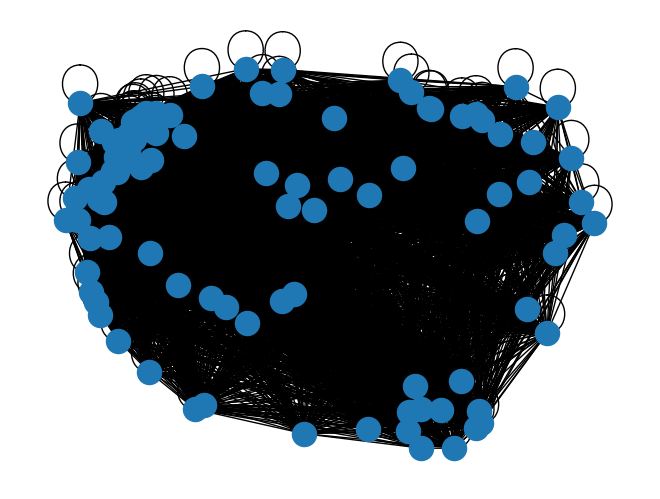

In [9]:
nx.draw(G)

In [10]:
#重みが1（自己ループ）と0.7以下のものを削除
select_df=corr_df[corr_df['weight']!=1]
select_df=select_df[select_df['weight']>0.7]
select_df

,source,target,weight
1,ENSG00000198888,ENSG00000198727,0.759368
36,ENSG00000198888,ENSG00000100234,0.828533
38,ENSG00000198888,ENSG00000177666,0.735783
52,ENSG00000198888,ENSG00000074181,0.743603
77,ENSG00000198888,ENSG00000129538,0.759548
...,...,...,...
9925,ENSG00000108518,ENSG00000161016,0.709661
9969,ENSG00000108518,ENSG00000130726,0.714473
9973,ENSG00000108518,ENSG00000085063,0.768577
9981,ENSG00000108518,ENSG00000130175,0.895741


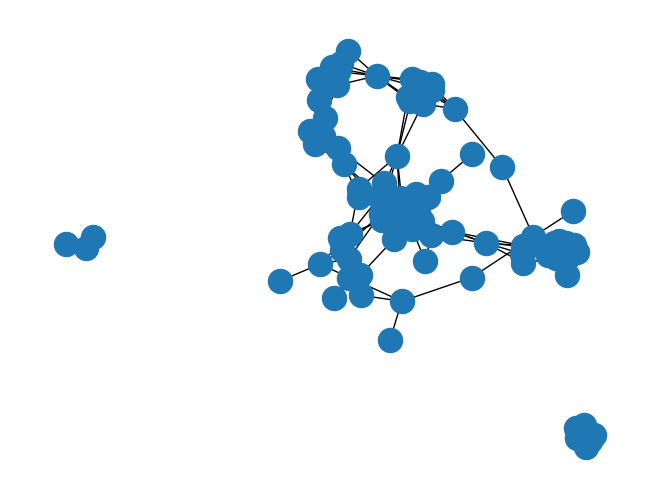

In [11]:
#再度グラフを作成
G=nx.Graph()

for index, row in select_df.iterrows(): #１行ずつ取り出す
    G.add_edge(row['source'],row['target'],weight=row['weight']) #エッジ、ノード、重みをグラフに追加

nx.draw(G)

In [12]:
print(G.number_of_nodes()) #ノードの数
print(G.number_of_edges()) #エッジの数
print(G.degree) #各ノードの接続数

97
389
[('ENSG00000198888', 5), ('ENSG00000198727', 6), ('ENSG00000100234', 17), ('ENSG00000177666', 12), ('ENSG00000074181', 18), ('ENSG00000129538', 15), ('ENSG00000198840', 10), ('ENSG00000198886', 7), ('ENSG00000198938', 9), ('ENSG00000198712', 6), ('ENSG00000212907', 7), ('ENSG00000198899', 9), ('ENSG00000198763', 6), ('ENSG00000198804', 7), ('ENSG00000228253', 7), ('ENSG00000109846', 6), ('ENSG00000133392', 5), ('ENSG00000101335', 6), ('ENSG00000130176', 3), ('ENSG00000198786', 7), ('ENSG00000198695', 7), ('ENSG00000111245', 7), ('ENSG00000110955', 4), ('ENSG00000174437', 10), ('ENSG00000167658', 9), ('ENSG00000161016', 8), ('ENSG00000177469', 16), ('ENSG00000171223', 15), ('ENSG00000085063', 13), ('ENSG00000034510', 11), ('ENSG00000169564', 8), ('ENSG00000106211', 3), ('ENSG00000185650', 16), ('ENSG00000104879', 9), ('ENSG00000149925', 9), ('ENSG00000101210', 6), ('ENSG00000196091', 8), ('ENSG00000082641', 9), ('ENSG00000129250', 9), ('ENSG00000196218', 8), ('ENSG00000143632', 8